In [44]:
import helpers
import numpy as np
import math
import re
from copy import deepcopy

data = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
with open("input_16.txt", 'r') as f:
    data = f.read().rstrip()
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [x.split('\n') for x in data.split('\n\n') if x]
#np.prod(sum(data))    
state = {}
flow_dictionary = {}
connected_dictionary = {}
state['valves_on'] = {}
for line in data.split('\n'):
    valves = line.split('valve')[1].replace(',', '')
    valves = [x for x in valves.split(' ') if len(x) > 1]
    split_line = line.split(' ')
    valve = split_line[1]
    flow = int(split_line[4].replace(';', '').split('=')[1])
    flow_dictionary[valve] = flow
    connected_dictionary[valve] = valves
    if flow == 0:
        state['valves_on'][valve] = True
    else:
        state['valves_on'][valve] = False
print(state)  
print(flow_dictionary)
connected_dictionary
    

{'valves_on': {'VR': False, 'UV': True, 'OH': True, 'GD': True, 'NS': True, 'KZ': False, 'AH': True, 'SA': True, 'VK': True, 'GB': True, 'AJ': False, 'PJ': True, 'KO': True, 'AA': True, 'TW': True, 'VG': False, 'BP': True, 'XH': True, 'TX': True, 'IR': False, 'TU': True, 'KC': True, 'LN': True, 'HD': True, 'KE': True, 'VY': True, 'LH': True, 'EM': True, 'SO': False, 'EC': True, 'KV': True, 'FE': True, 'TI': True, 'SC': False, 'ZP': True, 'RO': False, 'ZR': True, 'JL': False, 'PW': False, 'UL': True, 'GN': True, 'TN': True, 'NV': True, 'DI': False, 'IC': True, 'JF': True, 'LE': True, 'BS': True, 'JD': False, 'SP': False, 'NY': True, 'OM': False, 'GH': True, 'RI': False}}
{'VR': 11, 'UV': 0, 'OH': 0, 'GD': 0, 'NS': 0, 'KZ': 18, 'AH': 0, 'SA': 0, 'VK': 0, 'GB': 0, 'AJ': 6, 'PJ': 0, 'KO': 0, 'AA': 0, 'TW': 0, 'VG': 25, 'BP': 0, 'XH': 0, 'TX': 0, 'IR': 10, 'TU': 0, 'KC': 0, 'LN': 0, 'HD': 0, 'KE': 0, 'VY': 0, 'LH': 0, 'EM': 0, 'SO': 22, 'EC': 0, 'KV': 0, 'FE': 0, 'TI': 0, 'SC': 14, 'ZP': 0,

{'VR': ['LH', 'KV', 'BP'],
 'UV': ['GH', 'RO'],
 'OH': ['AJ', 'NY'],
 'GD': ['TX', 'PW'],
 'NS': ['AJ', 'AA'],
 'KZ': ['KO', 'VK', 'PJ'],
 'AH': ['ZP', 'DI'],
 'SA': ['VG', 'JF'],
 'VK': ['RO', 'KZ'],
 'GB': ['XH', 'AA'],
 'AJ': ['IC', 'OH', 'ZR', 'NS', 'EM'],
 'PJ': ['KZ', 'SP'],
 'KO': ['KZ', 'LE'],
 'AA': ['TW', 'GB', 'TI', 'NS', 'UL'],
 'TW': ['TU', 'AA'],
 'VG': ['SA'],
 'BP': ['RO', 'VR'],
 'XH': ['GB', 'RI'],
 'TX': ['RI', 'GD'],
 'IR': ['TN', 'NY', 'JF'],
 'TU': ['JD', 'TW'],
 'KC': ['SP', 'RO'],
 'LN': ['EM', 'RI'],
 'HD': ['FE', 'SC'],
 'KE': ['OM', 'RI'],
 'VY': ['PW', 'BS'],
 'LH': ['OM', 'VR'],
 'EM': ['AJ', 'LN'],
 'SO': ['ZP', 'FE'],
 'EC': ['OM', 'UL'],
 'KV': ['SP', 'VR'],
 'FE': ['SO', 'HD'],
 'TI': ['AA', 'PW'],
 'SC': ['HD'],
 'ZP': ['SO', 'AH'],
 'RO': ['UV', 'BP', 'VK', 'KC'],
 'ZR': ['OM', 'AJ'],
 'JL': ['GN', 'TN'],
 'PW': ['TI', 'GN', 'VY', 'GD', 'IC'],
 'UL': ['EC', 'AA'],
 'GN': ['JL', 'PW'],
 'TN': ['JL', 'IR'],
 'NV': ['RI', 'JD'],
 'DI': ['LE', 'AH'],
 'IC

In [ ]:
state['time'] = 26
state['pressure'] = 0
max_pressure = 0

def move(state, position, cameFrom):
    #print(state['time'])
    global max_pressure
    state = deepcopy(state)
    if state['time'] == 0 or all(i for i in state['valves_on'].values()) or ((max_score(state, state['time']) + state['pressure']) <= max_pressure):
        if state['pressure'] > max_pressure:
            max_pressure = state['pressure']
            print(max_pressure)
        return
    
    if not state['valves_on'][position[0]]:
        state2 = deepcopy(state)
        position = deepcopy(position)
        #print(position)
        cameFrom = deepcopy(cameFrom)
        state2['valves_on'][position[0]] = True
        state2['time'] -= 1
        state2['pressure'] += state2['time'] * flow_dictionary[position[0]]
        cameFrom[0] = ""
        elephant_move(state2, position, cameFrom)
    for movement in get_best_routes(state, position[0]):
        position = deepcopy(position)
        cameFrom = deepcopy(cameFrom)
        if not movement == cameFrom[0]:
            state2 = deepcopy(state)
            state2['time'] -= 1
            position[0] = movement
            cameFrom[0] = position[0]
            elephant_move(state2, position, position)
            
            
def elephant_move(state, position, cameFrom):
    state = deepcopy(state)
    if all(i for i in state['valves_on'].values()):
        return
    if not state['valves_on'][position[1]]:
        state2 = deepcopy(state)
        position = deepcopy(position)
        cameFrom = deepcopy(cameFrom)
        state2['valves_on'][position[1]] = True
        state2['pressure'] += state2['time'] * flow_dictionary[position[1]]
        cameFrom[1] = ""
        move(state2, position, cameFrom)
        
    for movement in get_best_routes(state, position[1]):
        position = deepcopy(position)
        cameFrom = deepcopy(cameFrom)
        if not movement == cameFrom[1]:
            state2 = deepcopy(state)
            position[1] = movement
            cameFrom[1] = position[0]
            move(state2, position, position)
    
        
move(state, ["AA","AA"], ["", ""])        
        
max_pressure

1350
1364
1373
1404
1423
1437
1446
1448
1451
1521
1533
1537
1546
1550
1555
1560
1563
1566
1567
1655
1665
1673
1674
1676
1677
1679
1682
1687
1697
1705


In [ ]:
1451 too low
1705 too low

In [42]:
def max_score(state, time):
    scores = []
    for k,v in state['valves_on'].items():
        if not v:
            scores.append(flow_dictionary[k])
    scores.sort()
    scores = list(reversed(scores))
    score = 0
    if not len(scores) % 2 == 0:
        scores.append(0)
    for val1, val2 in zip(scores[::2], scores[1::2]):
        if time <= 0:
            break
        time -= 1
        score += time * val1
        score += time * val2
        time -= 1
    return(score)

In [29]:
max_score(state, 3)

86

In [51]:
import networkx as nx
G = nx.Graph()


# Add the nodes to the graph
G.add_nodes_from(connected_dictionary.keys())

# Add the edges to the graph
for node, neighbors in connected_dictionary.items():
    for neighbor in neighbors:
        #print(neighbor)
        G.add_edge(node, neighbor)

# Print the graph
#nx.draw(G)

#routes = {k: v for k,v in nx.single_source_shortest_path(G, "DD").items() if not state['valves_on'][k]}


In [54]:

def get_best_routes(state, pos):
    routes = {k: [len(v), flow_dictionary[k], v[1]] for k,v in nx.single_source_shortest_path(G, pos).items() if not state['valves_on'][k] and len(v) > 1 }
    #print(routes)
    sorted_routes = [v[2] for k, v in sorted(routes.items(), key=lambda item: (item[1][0], -item[1][1]))]

    # Print the sorted dictionary
    #print(sorted_routes)
    return sorted(set(sorted_routes), key=lambda x: sorted_routes.index(x))
            
get_best_routes(state, "AA")

['TI', 'NS', 'TW', 'UL', 'GB']

In [49]:
state

{'valves_on': {'VR': False,
  'UV': True,
  'OH': True,
  'GD': True,
  'NS': True,
  'KZ': False,
  'AH': True,
  'SA': True,
  'VK': True,
  'GB': True,
  'AJ': False,
  'PJ': True,
  'KO': True,
  'AA': True,
  'TW': True,
  'VG': False,
  'BP': True,
  'XH': True,
  'TX': True,
  'IR': False,
  'TU': True,
  'KC': True,
  'LN': True,
  'HD': True,
  'KE': True,
  'VY': True,
  'LH': True,
  'EM': True,
  'SO': False,
  'EC': True,
  'KV': True,
  'FE': True,
  'TI': True,
  'SC': False,
  'ZP': True,
  'RO': False,
  'ZR': True,
  'JL': False,
  'PW': False,
  'UL': True,
  'GN': True,
  'TN': True,
  'NV': True,
  'DI': False,
  'IC': True,
  'JF': True,
  'LE': True,
  'BS': True,
  'JD': False,
  'SP': False,
  'NY': True,
  'OM': False,
  'GH': True,
  'RI': False},
 'time': 26,
 'pressure': 0}

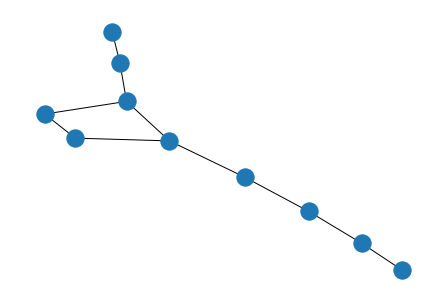

In [18]:
nx.draw(G)

In [ ]:
{'DD': [2, 20, 'DD'], 'BB': [2, 13, 'BB'], 'JJ': [3, 21, 'II'], 'EE': [3, 3, 'DD'], 'CC': [3, 2, 'DD'], 'HH': [6, 22, 'DD']}
